In [1]:
import geopandas as gpd
import cobra.postgres.interface as pgi
import cobra.utils.filehandling as fh
import cobra.utils.jobhandling as jh
import geopandas as gpd
import cobra.utils.geodatahandling as gdh

In [2]:
fileman = fh.Filemanager()
jobman = jh.Jobmanager()

In [3]:
datasets = fileman.get_data(datatype='OSM PBF')
datasets.head()

,Type,Dataset,File,Path,Size (MB)
41,OSM PBF,rbzddorf,duesseldorf-regbez-latest.osm.pbf,/download/rbzddorf,171.87
42,OSM PBF,Faroe,faroe-islands-latest.osm.pbf,/download/Faroe,4.59


In [4]:
rbzddorf = datasets.iloc[0]

In [9]:
jobman.create_import_job_from_dataset(rbzddorf, 'rbzddorfpower', style='power.style')

In [14]:
jobman.get_jobs(df=True)

,UUID,Name,Job Type,Date created,Date started,Date finished,Priority,Status
0,65d11cb6-4faa-4c9f-8f31-f536202a0b48,Load OSM from rbzddorf,osm2pg,"Mon, 10 Jan 2022 21:34:36 GMT",None,"Mon, 10 Jan 2022 21:35:01 GMT",42,Finished


In [15]:
sql = 'SELECT osm.way AS geom, osm.* FROM rbzddorfpower.planet_osm_line osm WHERE power IS NOT NULL'

In [16]:
pg_interface = pgi.PgInterface()
conn = pg_interface.get_connection()
powerlines = gpd.GeoDataFrame.from_postgis(sql, conn)

In [17]:
powerlines.head()

,geom,osm_id,power,voltage,cables,circuits,operator,wires,frequency,name,ref,line,way
0,"LINESTRING (792922.900 6651518.524, 792845.121...",88127401,line,110000,6,2,RWE,single,50,110kV Halfeshof Nord+Süd,2353,None,0102000020110F00002A000000FADAAFCCB53228415A92...
1,"LINESTRING (788032.623 6651842.775, 788035.150...",113571930,substation,None,None,None,None,None,None,None,None,None,0102000020110F0000150000005878303F810C28414F80...
2,"LINESTRING (792742.829 6650060.094, 792822.178...",203057834,line,110000,6,2,Westnetz,single,50,None,0023,None,0102000020110F000008000000394CA3A84D312841E380...
3,"LINESTRING (795634.019 6649960.121, 795642.891...",977808411,cables,10000,None,None,None,None,50,None,None,None,0102000020110F000002000000CDB6D209E44728411970...
4,"LINESTRING (795654.903 6650022.781, 795649.615...",115979505,line,110000,3,None,Westnetz,single,50,None,None,None,0102000020110F0000050000004C9B31CE0D4828411873...


<AxesSubplot:>

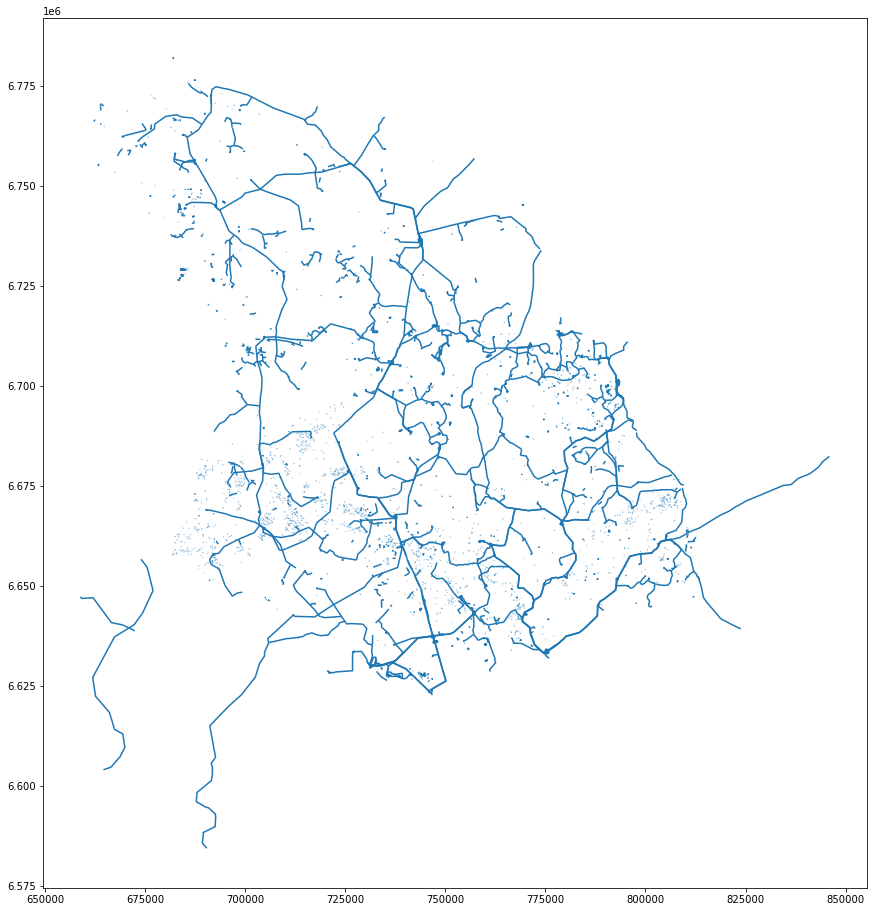

In [20]:
powerlines.plot(figsize=(16, 16))